Required code:

1. Python: Download a timeseries of daily deaths per country

2. Python: Convert the table so that each country and each day is a separate row

3. Python: Provide code to upload the table from step 3 into an SQL table named deaths_total

4. Python: From the data in step 2, calculate the daily change in deaths for each country

5. Python: Provide code to upload the table from step 4 into an SQL table named deaths_change_python

6. SQL: Provide SQL code to calculate the daily change for each country using only the data from deaths_total and save it into an SQL table named deaths_change_sql


In [1]:
#%reset

In [2]:
import pandas as pd
import numpy as np


1. Python: Download a timeseries of daily deaths per country

In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_death = pd.read_csv(url,index_col=0)
df_death.head(10)


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1,2,4,4,4,4,4,4,4,6
NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,5,5,6,8,10,10,11,15,15,16
NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,19,21,25,26,29,31,35,44,58,86
NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,1,1,3,3,3,6,8,12,14,15
NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,2
NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,...,6,8,9,13,18,19,23,27,28,36
NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,...,0,0,1,1,1,3,3,3,4,7
Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


2. Python: Convert the table so that each country and each day is a separate row

In [4]:
# change the dataframe to a multi-index array
df_death.reset_index(inplace = True)
df_death.set_index(['Country/Region','Province/State','Lat','Long'],inplace = True)
df_death.head()


,,,,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Country/Region,Province/State,Lat,Long,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,...,1,2,4,4,4,4,4,4,4,6
Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,...,5,5,6,8,10,10,11,15,15,16
Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,...,19,21,25,26,29,31,35,44,58,86
Andorra,NaN,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,...,1,1,3,3,3,6,8,12,14,15
Angola,NaN,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,2


In [5]:
# then convert it to a stack array
df_death_stacked = df_death.stack()
df_death_stacked = pd.DataFrame(df_death_stacked).reset_index()

df_death_stacked.rename(columns={"level_4": "Date", 0: "Total Deaths"},inplace = True)
df_death_stacked.head(10)


,Country/Region,Province/State,Lat,Long,Date,Total Deaths
0,Afghanistan,NaN,33.0,65.0,1/22/20,0
1,Afghanistan,NaN,33.0,65.0,1/23/20,0
2,Afghanistan,NaN,33.0,65.0,1/24/20,0
3,Afghanistan,NaN,33.0,65.0,1/25/20,0
4,Afghanistan,NaN,33.0,65.0,1/26/20,0
5,Afghanistan,NaN,33.0,65.0,1/27/20,0
6,Afghanistan,NaN,33.0,65.0,1/28/20,0
7,Afghanistan,NaN,33.0,65.0,1/29/20,0
8,Afghanistan,NaN,33.0,65.0,1/30/20,0
9,Afghanistan,NaN,33.0,65.0,1/31/20,0


In [6]:
df_death_stacked['Country/Region'].nunique()

181

In [7]:
# conver string to datetime

df_death_stacked['Date'] = pd.to_datetime(df_death_stacked['Date'],format='%m/%d/%y').dt.floor('d') 
df_death_stacked['Date']

0       2020-01-22
1       2020-01-23
2       2020-01-24
3       2020-01-25
4       2020-01-26
5       2020-01-27
6       2020-01-28
7       2020-01-29
8       2020-01-30
9       2020-01-31
10      2020-02-01
11      2020-02-02
12      2020-02-03
13      2020-02-04
14      2020-02-05
15      2020-02-06
16      2020-02-07
17      2020-02-08
18      2020-02-09
19      2020-02-10
20      2020-02-11
21      2020-02-12
22      2020-02-13
23      2020-02-14
24      2020-02-15
25      2020-02-16
26      2020-02-17
27      2020-02-18
28      2020-02-19
29      2020-02-20
           ...    
18546   2020-03-04
18547   2020-03-05
18548   2020-03-06
18549   2020-03-07
18550   2020-03-08
18551   2020-03-09
18552   2020-03-10
18553   2020-03-11
18554   2020-03-12
18555   2020-03-13
18556   2020-03-14
18557   2020-03-15
18558   2020-03-16
18559   2020-03-17
18560   2020-03-18
18561   2020-03-19
18562   2020-03-20
18563   2020-03-21
18564   2020-03-22
18565   2020-03-23
18566   2020-03-24
18567   2020

In [8]:
# calculate the total death number for each country

df_death_by_country = df_death_stacked.groupby(['Country/Region','Date'])['Total Deaths'].sum().reset_index()
df_death_by_country.head()

,Country/Region,Date,Total Deaths
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0


In [9]:
df_death_by_country.nunique()

Country/Region    181
Date               72
Total Deaths      351
dtype: int64

In [10]:
df_death_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13032 entries, 0 to 13031
Data columns (total 3 columns):
Country/Region    13032 non-null object
Date              13032 non-null datetime64[ns]
Total Deaths      13032 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 305.5+ KB


3. Python: Provide code to upload the table from step 3 into an SQL table named deaths_total

In [78]:
# As a demonstration, we create an in-memory SQLite database.

 
import sqlite3
connection = sqlite3.connect("myTable.db") 
# cursor  
crsr = connection.cursor() 
#df_death_by_country.to_sql('deaths_total', con=connection)



sql_command = """

  SELECT * FROM  deaths_total 
  ;

 """

# sql_command = """DROP TABLE deaths_total; """

ans = crsr.execute(sql_command).fetchall()

ans 



[(0, 'Afghanistan', '2020-01-22 00:00:00', 0),
 (1, 'Afghanistan', '2020-01-23 00:00:00', 0),
 (2, 'Afghanistan', '2020-01-24 00:00:00', 0),
 (3, 'Afghanistan', '2020-01-25 00:00:00', 0),
 (4, 'Afghanistan', '2020-01-26 00:00:00', 0),
 (5, 'Afghanistan', '2020-01-27 00:00:00', 0),
 (6, 'Afghanistan', '2020-01-28 00:00:00', 0),
 (7, 'Afghanistan', '2020-01-29 00:00:00', 0),
 (8, 'Afghanistan', '2020-01-30 00:00:00', 0),
 (9, 'Afghanistan', '2020-01-31 00:00:00', 0),
 (10, 'Afghanistan', '2020-02-01 00:00:00', 0),
 (11, 'Afghanistan', '2020-02-02 00:00:00', 0),
 (12, 'Afghanistan', '2020-02-03 00:00:00', 0),
 (13, 'Afghanistan', '2020-02-04 00:00:00', 0),
 (14, 'Afghanistan', '2020-02-05 00:00:00', 0),
 (15, 'Afghanistan', '2020-02-06 00:00:00', 0),
 (16, 'Afghanistan', '2020-02-07 00:00:00', 0),
 (17, 'Afghanistan', '2020-02-08 00:00:00', 0),
 (18, 'Afghanistan', '2020-02-09 00:00:00', 0),
 (19, 'Afghanistan', '2020-02-10 00:00:00', 0),
 (20, 'Afghanistan', '2020-02-11 00:00:00', 0),
 (

In [429]:
#!pip install pandasql

4. Python: From the data in step 2, calculate the daily change in deaths for each country

In [79]:
df_death_by_country['Deaths Change'] = 0
# key = []
# for index, row in df_death_by_country.iterrows():
#     if [row[0]]!=key:
#         #print(row[0],row[1])
#         key = [row[0]]
#         df_death_by_country.loc[index,'Deaths Change'] = 0
#     elif [row[0]]==key:
#         df_death_by_country.loc[index,'Deaths Change'] = df_death_by_country.loc[index,'Total Deaths']-df_death_by_country.loc[index-1,'Total Deaths']

df_death_by_country['Deaths Change'] = df_death_by_country.groupby('Country/Region')['Total Deaths'].diff()
df_death_by_country['Deaths Change'] = df_death_by_country['Deaths Change'].fillna(0).astype(np.int16)
#df_death_by_country.head()

#df_death_by_country[df_death_by_country.Date > '2020-03-30']
df_death_by_country[df_death_by_country['Country/Region'] == 'Australia']


,Country/Region,Date,Total Deaths,Deaths Change
576,Australia,2020-01-22,0,0
577,Australia,2020-01-23,0,0
578,Australia,2020-01-24,0,0
579,Australia,2020-01-25,0,0
580,Australia,2020-01-26,0,0
581,Australia,2020-01-27,0,0
582,Australia,2020-01-28,0,0
583,Australia,2020-01-29,0,0
584,Australia,2020-01-30,0,0
585,Australia,2020-01-31,0,0


In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [217]:


# caculate the days from the first date
x = (df_death_by_country['Date'] - df_death_by_country.loc[0,'Date'])/np.timedelta64(1, 'D')

# show the top 10 countries with largest number of total death and new deaths
y1_index = df_death_by_country.groupby('Country/Region')['Total Deaths'].max().sort_values(ascending=False)
y2_index = df_death_by_country.groupby('Country/Region')['Deaths Change'].max().sort_values(ascending=False)

y1_index = y1_index.index[0:10]
y2_index = y2_index.index[0:10]


y1 = df_death_by_country[[x in (y1_index|y2_index) for x in df_death_by_country['Country/Region']]]['Total Deaths']
y2 = df_death_by_country[[x in (y1_index|y2_index) for x in df_death_by_country['Country/Region']]]['Deaths Change']
hue = df_death_by_country[[x in (y1_index|y2_index) for x in df_death_by_country['Country/Region']]]['Country/Region']



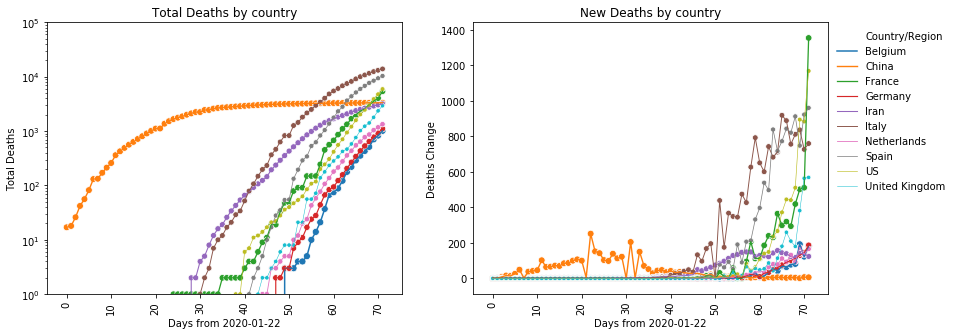

In [220]:
plt.figure (figsize=(14, 5))
plt.subplot(1,2,1)
sns.lineplot(x,y1,hue = hue,legend=False,markers=True,size=hue,sizes=(.5, 1.5))
sns.scatterplot(x,y1,hue = hue,legend=False,markers=True,size=hue,sizes=(20, 50))

plt.xticks(rotation=90)
plt.title('Total Deaths by country')
plt.xlabel('Days from 2020-01-22')
plt.yscale("log")
plt.ylim(1,100000)

plt.subplot(1,2,2)
sns.lineplot(x,y2,hue = hue,legend='brief',markers=True,size=hue,sizes=(.5, 1.5))
sns.scatterplot(x,y2,hue = hue,legend=False,markers=True,size=hue,sizes=(20, 50))
plt.xticks(rotation=90)
plt.title('New Deaths by country')
plt.xlabel('Days from 2020-01-22')
plt.legend(loc='upper left', frameon=False,bbox_to_anchor=(1.0, 1),ncol=1)
#plt.yscale("log")

5. Python: Provide code to upload the table from step 4 into an SQL table named deaths_change_python

In [83]:
df_death_by_country.to_sql('deaths_change_python', con=connection)

sql_command = """

  SELECT * FROM  deaths_change_python
  ;

 """

# sql_command = """DROP TABLE deaths_total; """

ans = crsr.execute(sql_command).fetchall()

ans 

[(0, 'Afghanistan', '2020-01-22 00:00:00', 0, 0),
 (1, 'Afghanistan', '2020-01-23 00:00:00', 0, 0),
 (2, 'Afghanistan', '2020-01-24 00:00:00', 0, 0),
 (3, 'Afghanistan', '2020-01-25 00:00:00', 0, 0),
 (4, 'Afghanistan', '2020-01-26 00:00:00', 0, 0),
 (5, 'Afghanistan', '2020-01-27 00:00:00', 0, 0),
 (6, 'Afghanistan', '2020-01-28 00:00:00', 0, 0),
 (7, 'Afghanistan', '2020-01-29 00:00:00', 0, 0),
 (8, 'Afghanistan', '2020-01-30 00:00:00', 0, 0),
 (9, 'Afghanistan', '2020-01-31 00:00:00', 0, 0),
 (10, 'Afghanistan', '2020-02-01 00:00:00', 0, 0),
 (11, 'Afghanistan', '2020-02-02 00:00:00', 0, 0),
 (12, 'Afghanistan', '2020-02-03 00:00:00', 0, 0),
 (13, 'Afghanistan', '2020-02-04 00:00:00', 0, 0),
 (14, 'Afghanistan', '2020-02-05 00:00:00', 0, 0),
 (15, 'Afghanistan', '2020-02-06 00:00:00', 0, 0),
 (16, 'Afghanistan', '2020-02-07 00:00:00', 0, 0),
 (17, 'Afghanistan', '2020-02-08 00:00:00', 0, 0),
 (18, 'Afghanistan', '2020-02-09 00:00:00', 0, 0),
 (19, 'Afghanistan', '2020-02-10 00:00:00

6. SQL: Provide SQL code to calculate the daily change for each country using only the data from deaths_total and save it into an SQL table named deaths_change_sql

In [113]:
sql_command = """
DROP TABLE deaths_change_sql
"""
crsr.execute(sql_command)


sql_command1 = """

CREATE TABLE deaths_change_sql AS

SELECT D.[Country/Region], date(D.Date) AS DATE, D.[Total Deaths] AS TOTAL_DEATHS, IFNULL(DF.DIFF,D.[Total Deaths]) AS NEW_DEATHS

FROM deaths_total D 

LEFT JOIN
 (
 SELECT D1.[Country/Region], D1.Date,
 (D1.[Total Deaths] - D2.[Total Deaths]) as DIFF
 FROM 
 deaths_total D1, deaths_total D2
 WHERE 
 D1.[Country/Region] = D2.[Country/Region]
 AND 
 Cast((JulianDay(D1.Date) - JulianDay(D2.Date)) As Integer) = 1  
 ) 
 AS DF 

ON D.[Country/Region] = DF.[Country/Region] AND date(D.Date) = date(DF.Date)

;

 """

crsr.execute(sql_command1)


sql_command2 ="""

SELECT * FROM deaths_change_sql;

"""

ans = crsr.execute(sql_command2)
names = list(map(lambda x: x[0], ans.description))
table = ans.fetchall()

[names,table]

[['Country/Region', 'DATE', 'TOTAL_DEATHS', 'NEW_DEATHS'],
 [('Afghanistan', '2020-01-22', 0, 0),
  ('Afghanistan', '2020-01-23', 0, 0),
  ('Afghanistan', '2020-01-24', 0, 0),
  ('Afghanistan', '2020-01-25', 0, 0),
  ('Afghanistan', '2020-01-26', 0, 0),
  ('Afghanistan', '2020-01-27', 0, 0),
  ('Afghanistan', '2020-01-28', 0, 0),
  ('Afghanistan', '2020-01-29', 0, 0),
  ('Afghanistan', '2020-01-30', 0, 0),
  ('Afghanistan', '2020-01-31', 0, 0),
  ('Afghanistan', '2020-02-01', 0, 0),
  ('Afghanistan', '2020-02-02', 0, 0),
  ('Afghanistan', '2020-02-03', 0, 0),
  ('Afghanistan', '2020-02-04', 0, 0),
  ('Afghanistan', '2020-02-05', 0, 0),
  ('Afghanistan', '2020-02-06', 0, 0),
  ('Afghanistan', '2020-02-07', 0, 0),
  ('Afghanistan', '2020-02-08', 0, 0),
  ('Afghanistan', '2020-02-09', 0, 0),
  ('Afghanistan', '2020-02-10', 0, 0),
  ('Afghanistan', '2020-02-11', 0, 0),
  ('Afghanistan', '2020-02-12', 0, 0),
  ('Afghanistan', '2020-02-13', 0, 0),
  ('Afghanistan', '2020-02-14', 0, 0),
  ('A